# Import Libraries

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [13]:
psePupil = pd.read_csv('COVID_PSchExpPupil.csv',index_col = 0)
psePupil.head()

,State,cases,deaths,Public School Expenditure 2016(Thousands),Student Enrollment,School Expenditures per Student Enrollment(Percent)
0,Alabama,387786,14345,6885677.0,743789.0,9257.567670
1,Alaska,18316,367,2319662.0,132477.0,17509.922477
2,Arizona,426614,18857,8551673.0,1109040.0,7710.878778
3,Arkansas,161569,3301,4872214.0,492132.0,9900.217828
4,California,2664110,102387,72003129.0,6305347.0,11419.376126


In [14]:
psePupil = psePupil.drop(columns = ['cases', 'deaths'])
psePupil.head()

,State,Public School Expenditure 2016(Thousands),Student Enrollment,School Expenditures per Student Enrollment(Percent)
0,Alabama,6885677.0,743789.0,9257.567670
1,Alaska,2319662.0,132477.0,17509.922477
2,Arizona,8551673.0,1109040.0,7710.878778
3,Arkansas,4872214.0,492132.0,9900.217828
4,California,72003129.0,6305347.0,11419.376126


In [15]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [16]:
psePupil = pd.merge(psePupil, COVID, how = 'left', on = 'State')
psePupil.head()

,State,Public School Expenditure 2016(Thousands),Student Enrollment,School Expenditures per Student Enrollment(Percent),cases,deaths
0,Alabama,6885677.0,743789.0,9257.567670,26912,785
1,Alaska,2319662.0,132477.0,17509.922477,751,10
2,Arizona,8551673.0,1109040.0,7710.878778,39298,1228
3,Arkansas,4872214.0,492132.0,9900.217828,13191,188
4,California,72003129.0,6305347.0,11419.376126,159098,5202


In [17]:
psePupil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State                                                51 non-null     object 
 1   Public School Expenditure 2016(Thousands)            51 non-null     float64
 2   Student Enrollment                                   51 non-null     float64
 3   School Expenditures per Student Enrollment(Percent)  51 non-null     float64
 4   cases                                                51 non-null     int64  
 5   deaths                                               51 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.8+ KB


In [18]:
psePupil.isnull().sum()

State                                                  0
Public School Expenditure 2016(Thousands)              0
Student Enrollment                                     0
School Expenditures per Student Enrollment(Percent)    0
cases                                                  0
deaths                                                 0
dtype: int64

In [19]:
psePupil.describe()

,Public School Expenditure 2016(Thousands),Student Enrollment,School Expenditures per Student Enrollment(Percent),cases,deaths
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000
mean,1.168893e+07,9.889812e+05,12227.705256,41994.235294,2290.549020
std,1.437929e+07,1.179152e+06,3673.869017,63513.183767,4748.588326
min,1.253268e+06,8.402400e+04,7006.484326,614.000000,10.000000
25%,3.001788e+06,2.848645e+05,9654.866968,9231.500000,212.000000
50%,6.885677e+06,6.928780e+05,11373.929080,20152.000000,704.000000
75%,1.312050e+07,1.098035e+06,14362.276134,46961.500000,2469.500000
max,7.200313e+07,6.305347e+06,21817.698680,389349.000000,30683.000000


In [20]:
corr = psePupil.corr()
corr

,Public School Expenditure 2016(Thousands),Student Enrollment,School Expenditures per Student Enrollment(Percent),cases,deaths
Public School Expenditure 2016(Thousands),1.000000,0.936049,0.149882,0.838015,0.676474
Student Enrollment,0.936049,1.000000,-0.095132,0.619684,0.399916
School Expenditures per Student Enrollment(Percent),0.149882,-0.095132,1.000000,0.378514,0.482326
cases,0.838015,0.619684,0.378514,1.000000,0.957358
deaths,0.676474,0.399916,0.482326,0.957358,1.000000


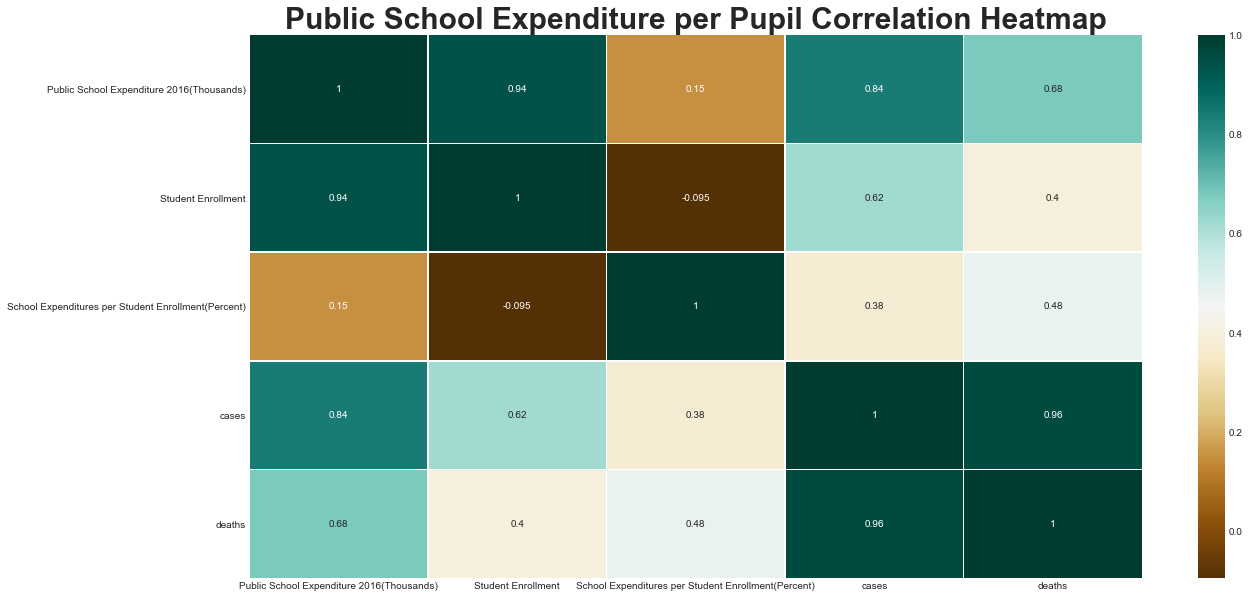

In [21]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Public School Expenditure per Pupil Correlation Heatmap', fontweight = 'bold', fontsize = 30);

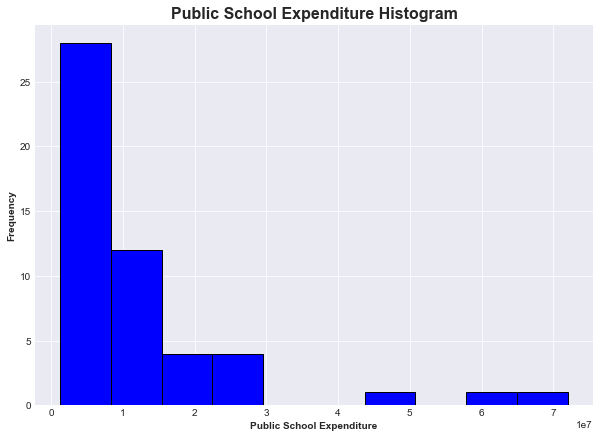

In [22]:
plt.style.use('seaborn-darkgrid')

psePupil['Public School Expenditure 2016(Thousands)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Public School Expenditure Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Public School Expenditure', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

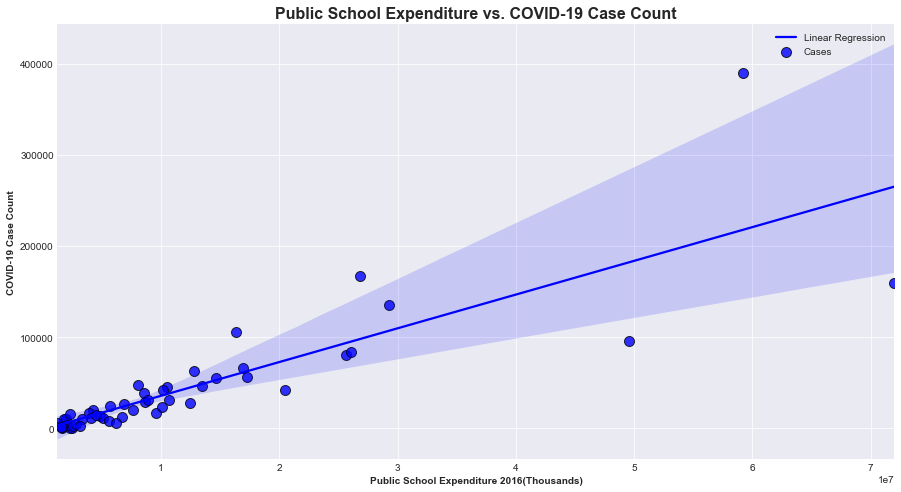

In [23]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Public School Expenditure 2016(Thousands)', y = 'cases', data = psePupil, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Public School Expenditure vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Public School Expenditure 2016(Thousands)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [24]:
spearmanr(psePupil['cases'], psePupil['Public School Expenditure 2016(Thousands)'])

SpearmanrResult(correlation=0.9266063348416289, pvalue=1.8724170563904846e-22)

In [25]:
model1 = sm.OLS(psePupil['cases'], psePupil['Public School Expenditure 2016(Thousands)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              192.6
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    8.90e-19
Time:                        13:08:55   Log-Likelihood:                         -605.00
No. Observations:                  51   AIC:                                      1212.
Df Residuals:                      50   BIC:                                      1214.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Public School Expenditure 2016(Thousands)     0.0037      0.000     13.879      0.000       0.003       0.004
==============================================================================
Omnibus:                       45.362   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.735
Skew:                           1.917   Prob(JB):                     1.90e-81
Kurtosis:                      15.658   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

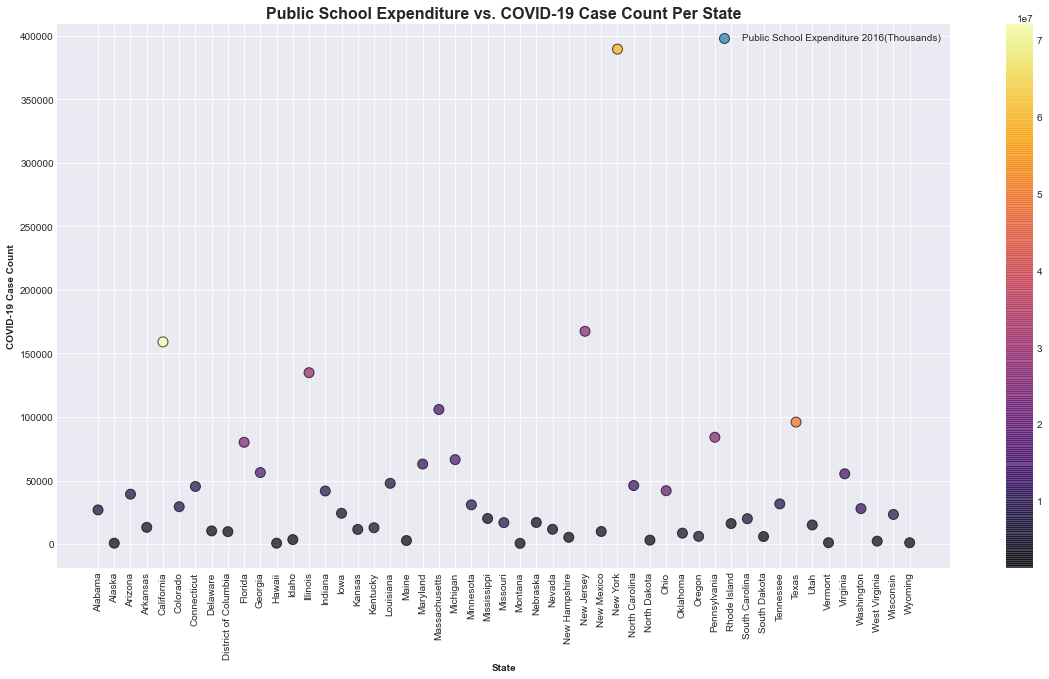

In [26]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = psePupil['State'] 
y = psePupil['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = psePupil['Public School Expenditure 2016(Thousands)'], cmap = 'inferno')
plt.title('Public School Expenditure vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Public School Expenditure 2016(Thousands)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

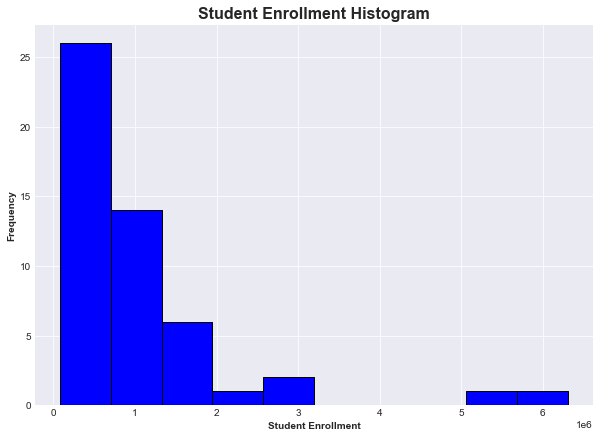

In [27]:
plt.style.use('seaborn-darkgrid')

psePupil['Student Enrollment'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Student Enrollment Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Student Enrollment', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

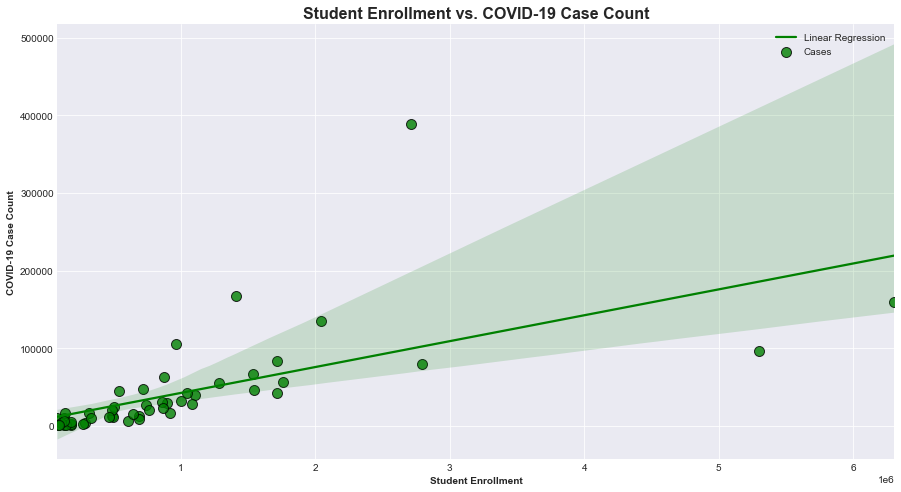

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Student Enrollment', y = 'cases', data = psePupil, color = 'g', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Student Enrollment vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Student Enrollment', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
spearmanr(psePupil['cases'], psePupil['Student Enrollment'])

SpearmanrResult(correlation=0.8913122171945701, pvalue=1.860142194056069e-18)

In [30]:
model2 = sm.OLS(psePupil['cases'], psePupil['Student Enrollment']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.566
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              65.14
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.29e-10
Time:                        13:08:56   Log-Likelihood:                         -624.00
No. Observations:                  51   AIC:                                      1250.
Df Residuals:                      50   BIC:                                      1252.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Student Enrollment     0.0372      0.005      8.071      0.000       0.028       0.046
==============================================================================
Omnibus:                       72.266   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.199
Skew:                           3.654   Prob(JB):                    3.67e-193
Kurtosis:                      22.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

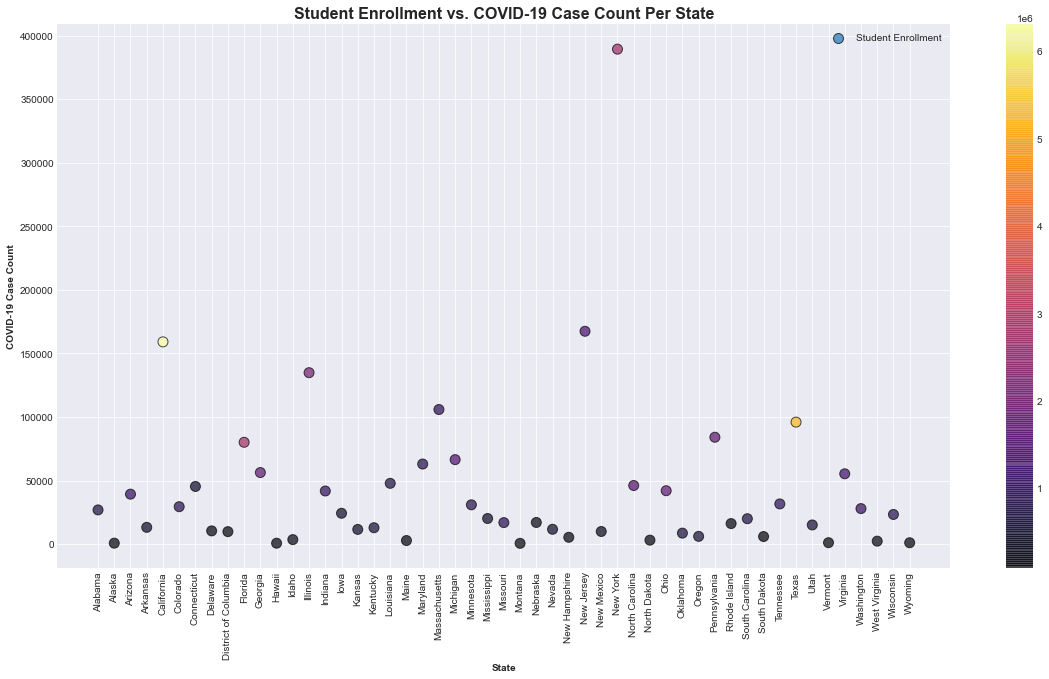

In [31]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = psePupil['State'] 
y = psePupil['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = psePupil['Student Enrollment'], cmap = 'inferno')
plt.title('Student Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Student Enrollment'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

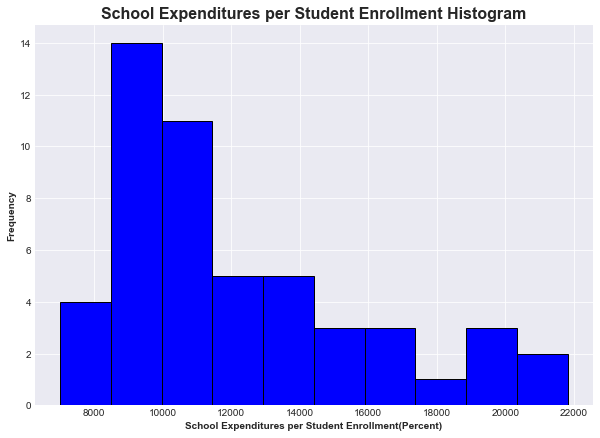

In [32]:
plt.style.use('seaborn-darkgrid')

psePupil['School Expenditures per Student Enrollment(Percent)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('School Expenditures per Student Enrollment Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('School Expenditures per Student Enrollment(Percent)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

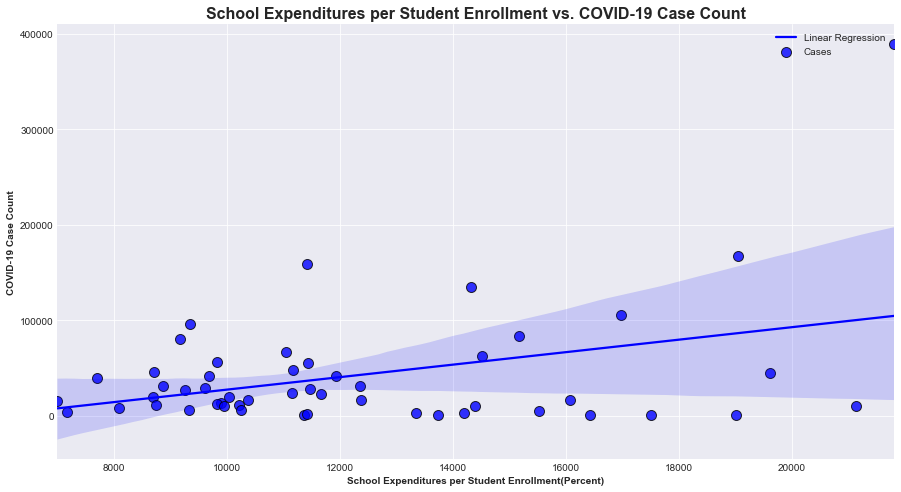

In [33]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'School Expenditures per Student Enrollment(Percent)', y = 'cases', data = psePupil, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('School Expenditures per Student Enrollment vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('School Expenditures per Student Enrollment(Percent)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [34]:
spearmanr(psePupil['cases'], psePupil['School Expenditures per Student Enrollment(Percent)'])

SpearmanrResult(correlation=0.0038914027149321265, pvalue=0.9783789325963802)

In [35]:
model3 = sm.OLS(psePupil['cases'], psePupil['School Expenditures per Student Enrollment(Percent)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.387
Model:                            OLS   Adj. R-squared (uncentered):              0.375
Method:                 Least Squares   F-statistic:                              31.56
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    8.55e-07
Time:                        13:08:57   Log-Likelihood:                         -632.80
No. Observations:                  51   AIC:                                      1268.
Df Residuals:                      50   BIC:                                      1270.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
School Expenditures per Student Enrollment(Percent)     3.6872      0.656      5.618      0.000       2.369       5.006
==============================================================================
Omnibus:                       60.609   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.771
Skew:                           3.088   Prob(JB):                     5.27e-96
Kurtosis:                      15.975   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

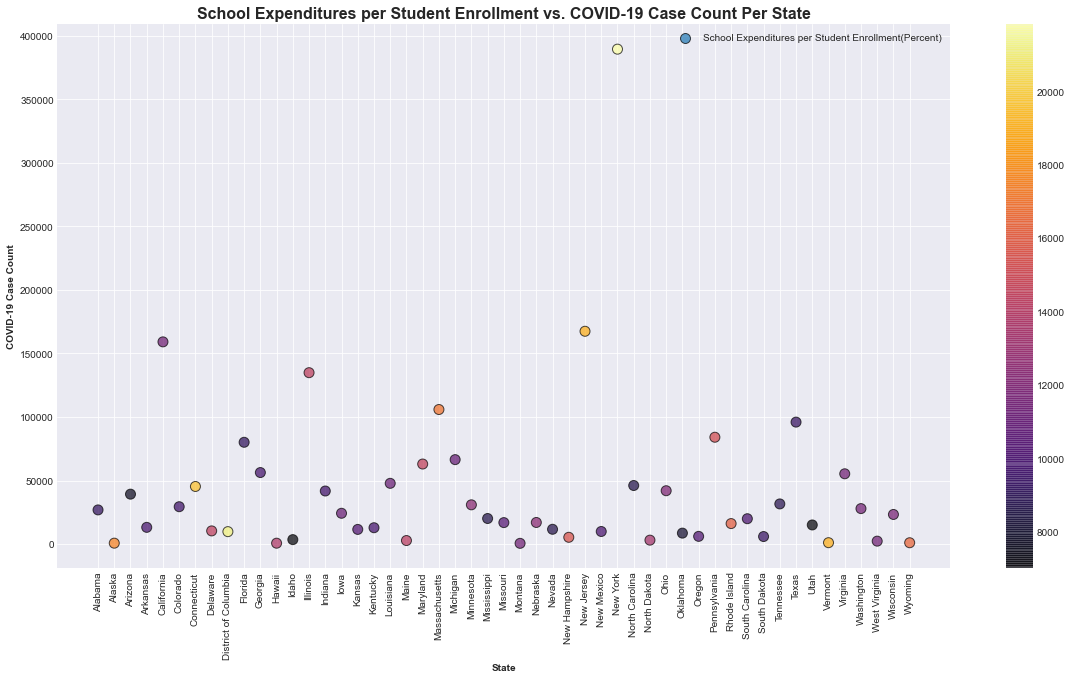

In [36]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = psePupil['State'] 
y = psePupil['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = psePupil['School Expenditures per Student Enrollment(Percent)'], cmap = 'inferno')
plt.title('School Expenditures per Student Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['School Expenditures per Student Enrollment(Percent)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [37]:
model4 = sm.OLS(psePupil['cases'], psePupil[['Public School Expenditure 2016(Thousands)', 'Student Enrollment', 
                                            'School Expenditures per Student Enrollment(Percent)']]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              269.2
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    5.16e-30
Time:                        13:08:58   Log-Likelihood:                         -571.82
No. Observations:                  51   AIC:                                      1150.
Df Residuals:                      48   BIC:                                      1155.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Public School Expenditure 2016(Thousands)               0.0091      0.001     16.859      0.000       0.008       0.010
Student Enrollment                                     -0.0695      0.006    -11.162      0.000      -0.082      -0.057
School Expenditures per Student Enrollment(Percent)     0.2535      0.265      0.956      0.344      -0.280       0.786
==============================================================================
Omnibus:                        7.691   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.549
Skew:                          -0.542   Prob(JB):                       0.0139
Kurtosis:                       4.687   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""